In [1]:
import argparse
import datetime
import os
import pprint

import numpy as np
import torch
from models import DQN, AtariViT, DNN
import retro
from retro_wrappers import make_atari_env
from torch.utils.tensorboard import SummaryWriter

from tianshou.data import Collector, VectorReplayBuffer
from tianshou.policy import DQNPolicy
from tianshou.trainer import offpolicy_trainer
from tianshou.utils import TensorboardLogger
from tianshou.utils.net.discrete import IntrinsicCuriosityModule


/home/arasha/GitHub/tianshou-retro-gym/venv-drl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import pickle
import matplotlib.pyplot as plt 

plt.plot()
sample_dict = pickle.load(open('sample_dict_no_render.pkl','rb'))
print(sample_dict)
avg = sum(sample_dict.values())/ len(sample_dict.values())
std = (sum((number - avg)**2 for number in sample_dict.values()) / len(sample_dict.values())) ** 0.5
print(std / avg )

defaultdict(None, {'Adventure-Atari2600': 3432.63702801337, 'AirRaid-Atari2600': 3174.9600556675346, 'Alien-Atari2600': 3082.3437239516647, 'Amidar-Atari2600': 2758.7838104935768, 'Asteroids-Atari2600': 3087.826353939301, 'BattleZone-Atari2600': 3160.995688198893, 'BeamRider-Atari2600': 3210.2665977563056, 'Berzerk-Atari2600': 3506.2911378352387, 'Bowling-Atari2600': 3460.108435271541, 'Boxing-Atari2600': 2937.2001190901406, 'Breakout-Atari2600': 3509.3953191205596, 'Carnival-Atari2600': 3141.0751254167203, 'Centipede-Atari2600': 2839.936265182342, 'ChopperCommand-Atari2600': 3267.3099960131426, 'CrazyClimber-Atari2600': 3751.3663008082563, 'ElevatorAction-Atari2600': 3186.6672334481295, 'Enduro-Atari2600': 2937.811651452301, 'FishingDerby-Atari2600': 3072.7488324913556, 'Freeway-Atari2600': 3056.005734440692, 'Frostbite-Atari2600': 3252.1823768295158, 'Hero-Atari2600': 3084.077786216179, 'Jamesbond-Atari2600': 3348.395764466612, 'JourneyEscape-Atari2600': 3068.9623192180934, 'Kangaroo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


defaultdict(<class 'dict'>, {'Pong-Atari2600': {1: 4.003131628036499, 2: 2.3152830600738525, 4: 1.5266032218933105, 8: 1.129776954650879, 16: 0.9532275199890137, 32: 0.9903841018676758, 64: 17.003931045532227}})
{}


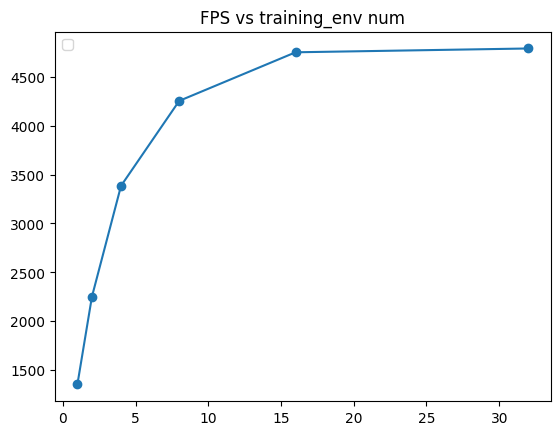

In [32]:
tsample_render = pickle.load(open('tsample_dict_render.pkl','rb'))
tsample_norender = pickle.load(open('tsample_dict_no_render.pkl','rb'))
print(tsample_render)
print(tsample_render[0])

plt.plot([1,2,4,8,16,32],[1353,2251,3385,4254,4751,4790],marker='o')
#plt.scatter(tsample_render['Pong-Atari2600'].keys(), tsample_render['Pong-Atari2600'].values(),marker='o',label='rendered')
#plt.scatter(tsample_norender['Pong-Atari2600'].keys(), tsample_norender['Pong-Atari2600'].values(),marker='x',label='not_rendered')
plt.title("FPS vs training_env num")
plt.legend(loc='upper left')
plt.show()

In [3]:
import bs4
import requests

url = "http://bossa.pl/pub/metastock/ofe/sesjaofe/"
r = requests.get(url)
data = bs4.BeautifulSoup(r.text, "html.parser")
for l in data.find_all("a"):
    r = requests.get(url + l["href"])
    print(r.status_code)

In [29]:
env = retro.make("Pong-Atari2600")
env.close()
#print(env.action_space,file=open("lul.txt",'w'))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/arasha/GitHub/tianshou-retro-gym/venv-drl/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1573/2012971806.py", line 1, in <module>
    env = retro.make("Pong-Atari2600")
  File "/home/arasha/GitHub/tianshou-retro-gym/venv-drl/lib/python3.8/site-packages/retro/__init__.py", line 55, in make
    return RetroEnv(game, state, inttype=inttype, **kwargs)
  File "/home/arasha/GitHub/tianshou-retro-gym/venv-drl/lib/python3.8/site-packages/retro/retro_env.py", line 87, in __init__
RuntimeError: Cannot create multiple emulator instances per process, make sure to call env.close() on each environment before creating a new one

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/arasha/GitHub/tianshou-retro-gym/venv-drl/lib/python3.8/site-packages/IPython/core/interactives